# importing libraries & reading dataset

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import sklearn
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error 
from sklearn.model_selection import train_test_split

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [3]:
data_set=pd.read_csv("insurance.csv")

# Data exploration

In [4]:
data_set.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
data_set.rename(columns={'sex':'gender'},inplace=True)
data_set

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [6]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   gender    1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


*Preprocessing

# Dropping null values

In [7]:
data_set.isnull().sum()

age         0
gender      0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Changing smoker values(yes=1,no=0)

In [8]:
for index, row in data_set.iterrows():
    if row['smoker']=='yes':
       data_set.at[index,'smoker']='1'
    elif row['smoker']=='no':
       data_set.at[index,'smoker']='0'  
data_set['smoker'] = data_set['smoker'].astype(int)
data_set

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,southwest,16884.92400
1,18,male,33.770,1,0,southeast,1725.55230
2,28,male,33.000,3,0,southeast,4449.46200
3,33,male,22.705,0,0,northwest,21984.47061
4,32,male,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,0,northwest,10600.54830
1334,18,female,31.920,0,0,northeast,2205.98080
1335,18,female,36.850,0,0,southeast,1629.83350
1336,21,female,25.800,0,0,southwest,2007.94500


# Check duplicates

In [9]:
duplicates=data_set[data_set.duplicated()]
duplicates

,age,gender,bmi,children,smoker,region,charges
581,19,male,30.59,0,0,northwest,1639.5631


In [10]:
no_duplicates = data_set.drop_duplicates()
data_set = no_duplicates.reset_index(drop=True)
data_set

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,southwest,16884.92400
1,18,male,33.770,1,0,southeast,1725.55230
2,28,male,33.000,3,0,southeast,4449.46200
3,33,male,22.705,0,0,northwest,21984.47061
4,32,male,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1332,50,male,30.970,3,0,northwest,10600.54830
1333,18,female,31.920,0,0,northeast,2205.98080
1334,18,female,36.850,0,0,southeast,1629.83350
1335,21,female,25.800,0,0,southwest,2007.94500


# 5 number summary

In [11]:
data_set.describe().round()

,age,bmi,children,smoker,charges
count,1337.0,1337.0,1337.0,1337.0,1337.0
mean,39.0,31.0,1.0,0.0,13279.0
std,14.0,6.0,1.0,0.0,12110.0
min,18.0,16.0,0.0,0.0,1122.0
25%,27.0,26.0,0.0,0.0,4746.0
50%,39.0,30.0,1.0,0.0,9386.0
75%,51.0,35.0,2.0,0.0,16658.0
max,64.0,53.0,5.0,1.0,63770.0


# Finding outlaiers 

<Axes: xlabel='bmi'>

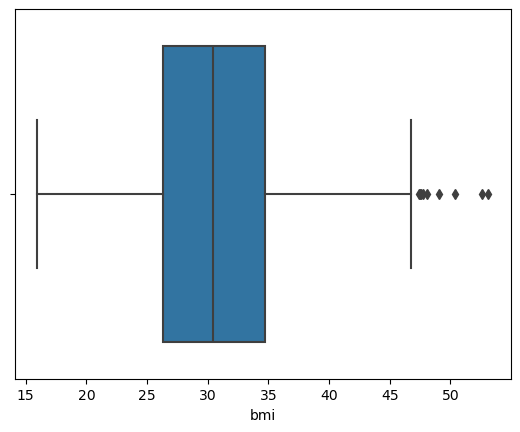

In [12]:
sns.boxplot(x='bmi',data=data_set)

<Axes: xlabel='charges'>

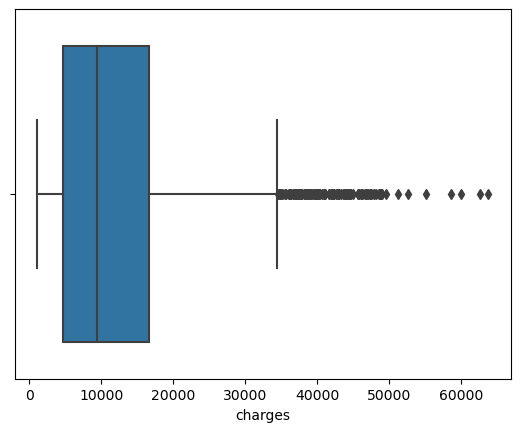

In [13]:
sns.boxplot(x='charges',data=data_set)

<Axes: xlabel='children'>

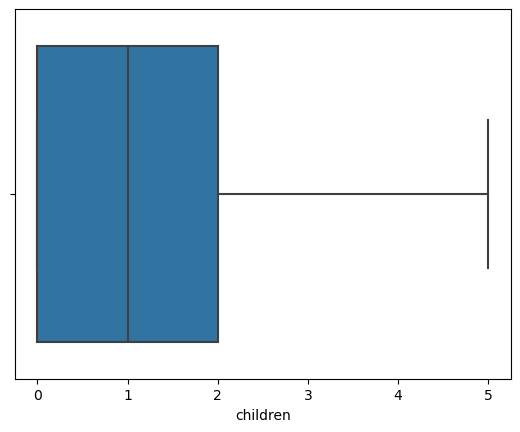

In [14]:
sns.boxplot(x='children',data=data_set)

<Axes: xlabel='age'>

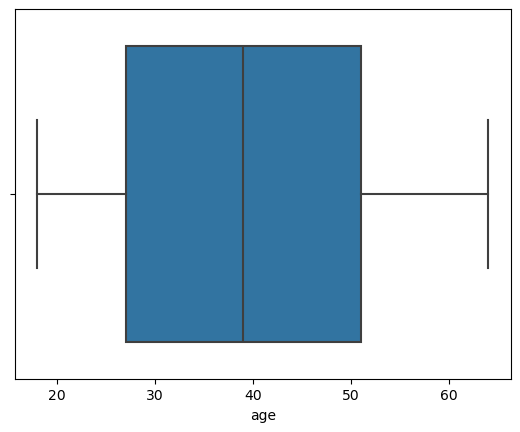

In [15]:
sns.boxplot(x='age',data=data_set)

<Axes: xlabel='smoker'>

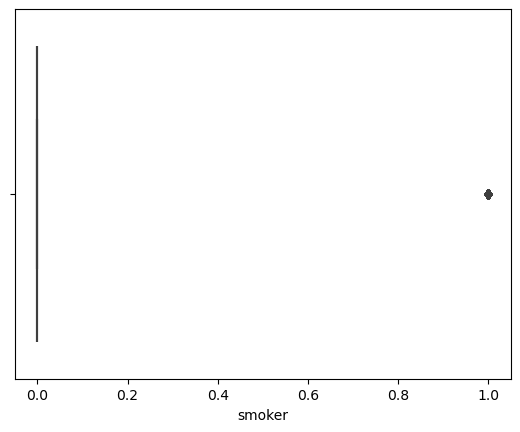

In [16]:
sns.boxplot(x='smoker',data=data_set)

# Dropping bmi outlaiers

<Axes: xlabel='bmi'>

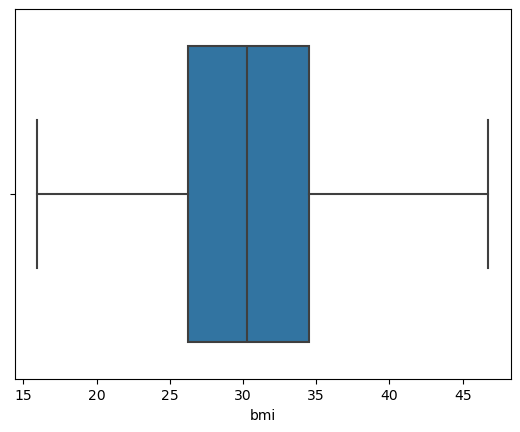

In [17]:
# Calculate the first quartile (Q1) and third quartile (Q3) of column 'A'
Q1 = data_set['bmi'].quantile(0.25)
Q3 = data_set['bmi'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Set a threshold for outliers (e.g., values outside of Q1 - 1.5*IQR and Q3 + 1.5*IQR)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers in column 'A'
outliers = data_set[(data_set['bmi'] < lower_bound) | (data_set['bmi'] > upper_bound)]

no_outliers = data_set.drop(outliers.index)
data_set = no_outliers.reset_index(drop=True)
data_set

sns.boxplot(x='bmi',data=data_set)

# Dropping charges outlaiers

<Axes: xlabel='charges'>

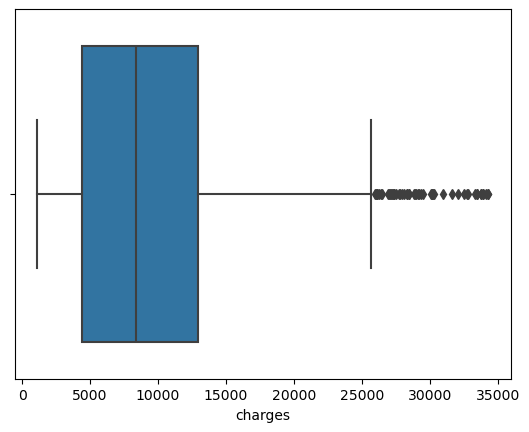

In [18]:
# Calculate the first quartile (Q1) and third quartile (Q3) of column 'A'
Q1 = data_set['charges'].quantile(0.25)
Q3 = data_set['charges'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Set a threshold for outliers (e.g., values outside of Q1 - 1.5*IQR and Q3 + 1.5*IQR)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers in column 'A'
outliers2 = data_set[(data_set['charges'] < lower_bound) | (data_set['charges'] > upper_bound)]

no_outliers2 = data_set.drop(outliers2.index)
data_set = no_outliers2.reset_index(drop=True)
data_set

sns.boxplot(x='charges',data=data_set)

<Axes: xlabel='charges'>

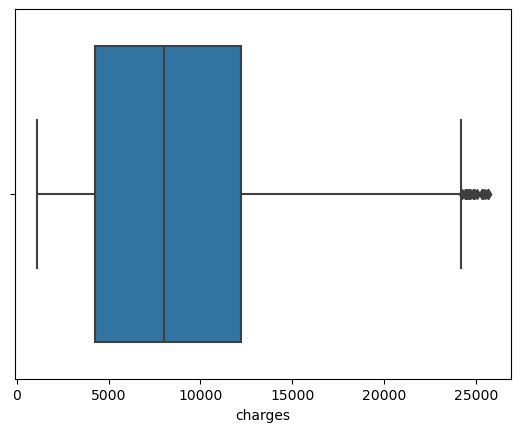

In [19]:
# Calculate the first quartile (Q1) and third quartile (Q3) of column 'A'
Q1 = data_set['charges'].quantile(0.25)
Q3 = data_set['charges'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Set a threshold for outliers (e.g., values outside of Q1 - 1.5*IQR and Q3 + 1.5*IQR)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers in column 'A'
outliers3 = data_set[(data_set['charges'] < lower_bound) | (data_set['charges'] > upper_bound)]

no_outliers3 = data_set.drop(outliers3.index)
data_set = no_outliers3.reset_index(drop=True)
data_set

sns.boxplot(x='charges',data=data_set)

<Axes: xlabel='charges'>

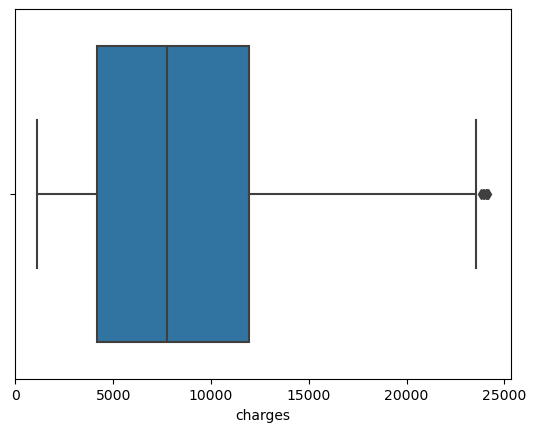

In [20]:
# Calculate the first quartile (Q1) and third quartile (Q3) of column 'A'
Q1 = data_set['charges'].quantile(0.25)
Q3 = data_set['charges'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Set a threshold for outliers (e.g., values outside of Q1 - 1.5*IQR and Q3 + 1.5*IQR)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers in column 'A'
outliers4 = data_set[(data_set['charges'] < lower_bound) | (data_set['charges'] > upper_bound)]

no_outliers4 = data_set.drop(outliers4.index)
data_set = no_outliers4.reset_index(drop=True)
data_set

sns.boxplot(x='charges',data=data_set)

<Axes: xlabel='charges'>

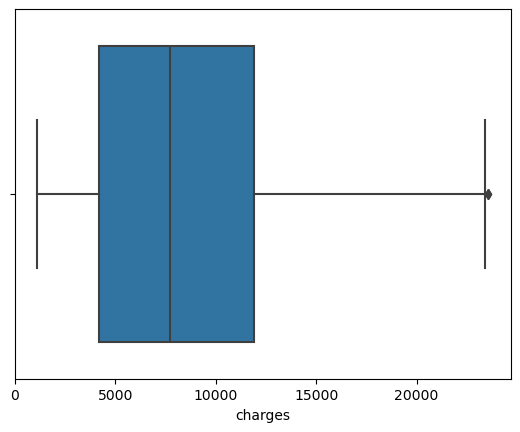

In [21]:
# Calculate the first quartile (Q1) and third quartile (Q3) of column 'A'
Q1 = data_set['charges'].quantile(0.25)
Q3 = data_set['charges'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Set a threshold for outliers (e.g., values outside of Q1 - 1.5*IQR and Q3 + 1.5*IQR)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers in column 'A'
outliers5 = data_set[(data_set['charges'] < lower_bound) | (data_set['charges'] > upper_bound)]

no_outliers5 = data_set.drop(outliers5.index)
data_set = no_outliers5.reset_index(drop=True)
data_set

sns.boxplot(x='charges',data=data_set)

<Axes: xlabel='charges'>

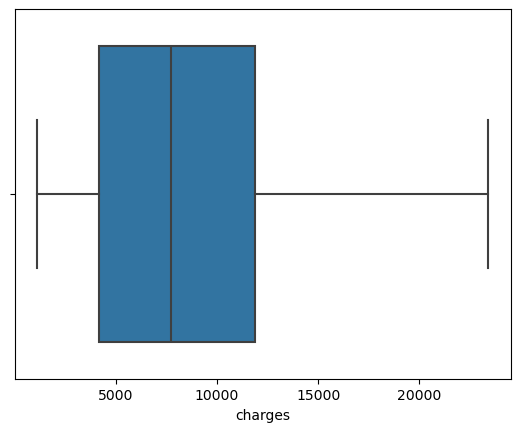

In [22]:
# Calculate the first quartile (Q1) and third quartile (Q3) of column 'A'
Q1 = data_set['charges'].quantile(0.25)
Q3 = data_set['charges'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Set a threshold for outliers (e.g., values outside of Q1 - 1.5*IQR and Q3 + 1.5*IQR)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers in column 'A'
outliers6 = data_set[(data_set['charges'] < lower_bound) | (data_set['charges'] > upper_bound)]

no_outliers6 = data_set.drop(outliers6.index)
data_set = no_outliers6.reset_index(drop=True)
data_set

sns.boxplot(x='charges',data=data_set)

# Changing gender values(female=0,male=1)

In [23]:
data_set['gender'].replace('female',0, inplace=True)
data_set['gender'].replace('male',1, inplace=True)
data_set['gender'] = data_set['gender'].astype(int)
data_set

,age,gender,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1104,52,0,44.700,3,0,southwest,11411.68500
1105,50,1,30.970,3,0,northwest,10600.54830
1106,18,0,31.920,0,0,northeast,2205.98080
1107,18,0,36.850,0,0,southeast,1629.83350


# Data visualization

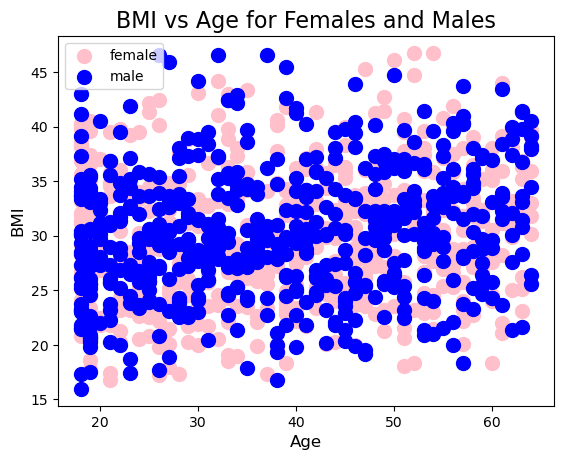

In [24]:
# Assuming 'gender' column contains 'female' for females and 'male' for males
plt.scatter(data_set[data_set['gender'] == 0]['age'].values, data_set[data_set['gender'] == 0]['bmi'].values, label='female', color="pink", s=100)
plt.scatter(data_set[data_set['gender'] == 1]['age'].values, data_set[data_set['gender'] == 1]['bmi'].values, label='male', color="blue", s=100)

plt.xlabel("Age", fontsize=12)
plt.ylabel("BMI", fontsize=12)
plt.rcParams["figure.figsize"] = (20, 15)  # Define size of plot
plt.grid(False)  # Remove grid lines
plt.legend()
plt.title("BMI vs Age for Females and Males", fontsize=16)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

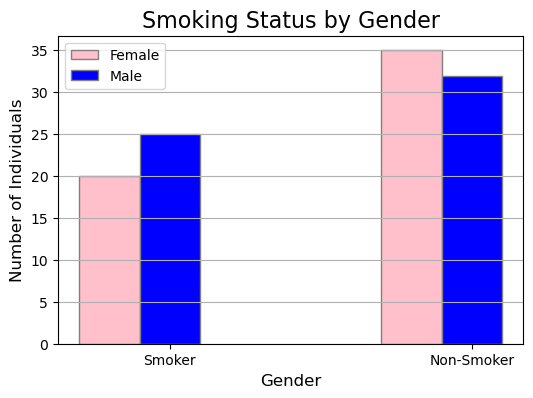

In [25]:
import matplotlib.pyplot as plt

female_smokers = [20, 35]  # Number of female smokers and non-smokers
male_smokers = [25, 32]    # Number of male smokers and non-smokers

barWidth = 0.20
r1 = range(len(female_smokers))
r2 = [x + barWidth for x in r1]

plt.figure(figsize=(6, 4))
plt.bar(r1, female_smokers, color='pink', width=barWidth, edgecolor='grey', label='Female')
plt.bar(r2, male_smokers, color='blue', width=barWidth, edgecolor='grey', label='Male')

plt.xlabel('Gender', fontsize=12)
plt.ylabel('Number of Individuals', fontsize=12)
plt.title('Smoking Status by Gender', fontsize=16)
plt.xticks([r + barWidth for r in range(len(female_smokers))], ['Smoker', 'Non-Smoker'])
plt.legend()
plt.grid(axis='y')

plt.show()

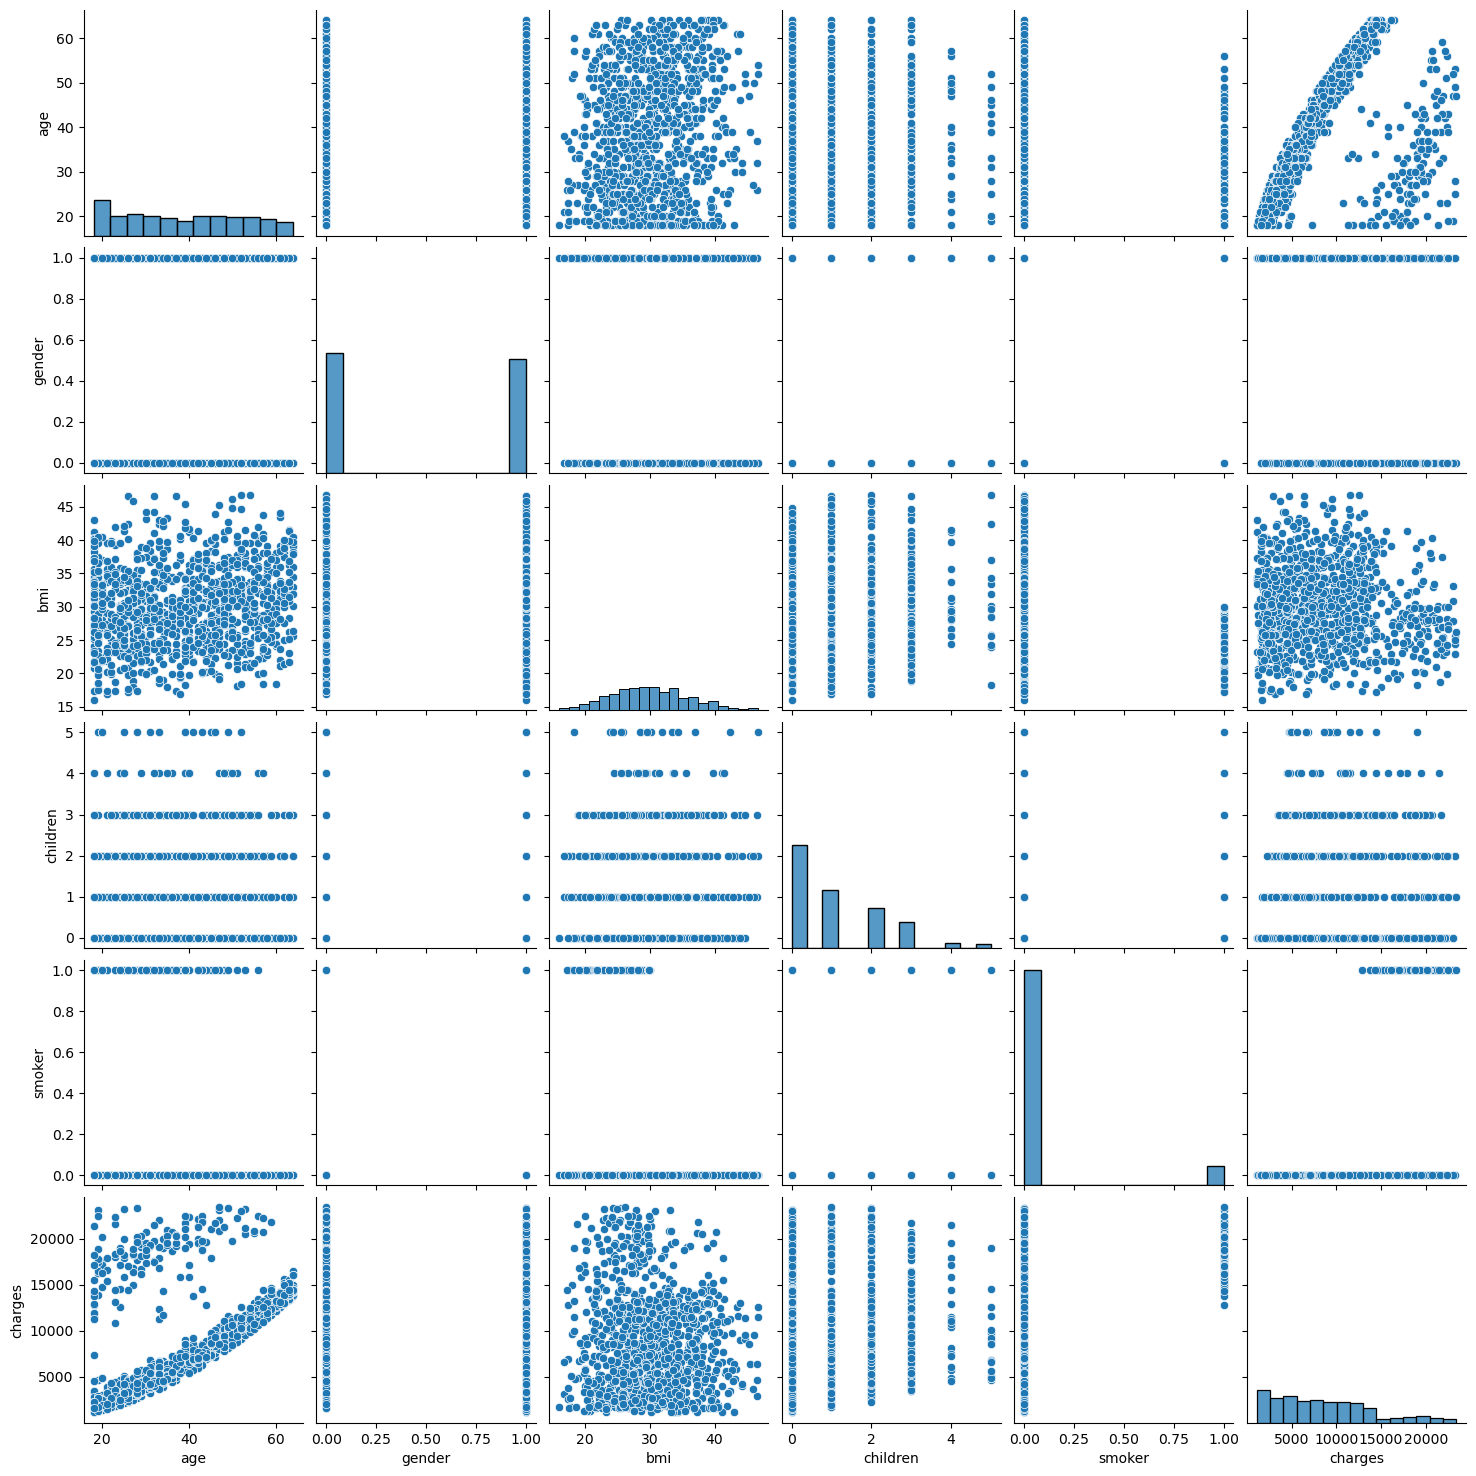

In [29]:
sns.pairplot(data_set)
plt.show()

# Linear regression

In [26]:
train_columns = ["age","gender","children","bmi","smoker"]
target_column= ["charges"]

X = data_set[train_columns].values
y = data_set[target_column].values
print(X.shape)
print("---")
print(y.shape)

(1109, 5)
---
(1109, 1)


In [43]:
numeric_features = ['age', 'children', 'bmi', 'gender', 'smoker'] 
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ])
#pipeline = Pipeline(steps=[
   # ('preprocessor', preprocessor),
   # ('regressor', LinearRegression())
#])


#pipeline.fit(X_train, y_train)
#train_score = pipeline.score(X_train, y_train)
#test_score = pipeline.score(X_test, y_test)


In [34]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=44,shuffle=True)

In [35]:
X_train

array([[63.   ,  1.   ,  0.   , 36.765,  0.   ],
       [21.   ,  0.   ,  0.   , 39.49 ,  0.   ],
       [36.   ,  0.   ,  1.   , 29.92 ,  0.   ],
       ...,
       [18.   ,  1.   ,  0.   , 23.75 ,  0.   ],
       [26.   ,  0.   ,  0.   , 40.185,  0.   ],
       [63.   ,  1.   ,  3.   , 39.8  ,  0.   ]])

In [28]:
X_test

array([[53.   ,  1.   ,  0.   , 24.32 ,  0.   ],
       [42.   ,  0.   ,  0.   , 32.87 ,  0.   ],
       [51.   ,  0.   ,  3.   , 36.385,  0.   ],
       ...,
       [46.   ,  0.   ,  1.   , 27.72 ,  0.   ],
       [52.   ,  1.   ,  0.   , 33.25 ,  0.   ],
       [28.   ,  1.   ,  1.   , 37.1  ,  0.   ]])

In [29]:
y_train

array([[13981.85035 ],
       [ 2026.9741  ],
       [ 5478.0368  ],
       [ 3987.926   ],
       [ 8825.086   ],
       [ 2643.2685  ],
       [ 8219.2039  ],
       [ 9101.798   ],
       [13462.52    ],
       [ 1964.78    ],
       [11840.77505 ],
       [12222.8983  ],
       [ 6500.2359  ],
       [ 9964.06    ],
       [10560.4917  ],
       [ 4237.12655 ],
       [ 3213.62205 ],
       [ 2473.3341  ],
       [ 4934.705   ],
       [ 9391.346   ],
       [ 3704.3545  ],
       [ 2727.3951  ],
       [ 4500.33925 ],
       [ 7243.8136  ],
       [12644.589   ],
       [ 1824.2854  ],
       [ 4504.6624  ],
       [12347.172   ],
       [ 3366.6697  ],
       [ 8932.084   ],
       [ 8596.8278  ],
       [ 6358.77645 ],
       [11848.141   ],
       [ 4185.0979  ],
       [13880.949   ],
       [ 4746.344   ],
       [ 3490.5491  ],
       [17468.9839  ],
       [ 6940.90985 ],
       [ 6338.0756  ],
       [ 3167.45585 ],
       [13470.86    ],
       [ 2304.0022  ],
       [145

In [30]:
y_test

array([[ 9863.4718 ],
       [ 7050.0213 ],
       [11436.73815],
       [ 3172.018  ],
       [ 5425.02335],
       [11520.09985],
       [ 5138.2567 ],
       [12913.9924 ],
       [ 7152.6714 ],
       [ 1634.5734 ],
       [ 1977.815  ],
       [ 8978.1851 ],
       [ 6858.4796 ],
       [19515.5416 ],
       [ 6948.7008 ],
       [ 6203.90175],
       [12096.6512 ],
       [ 1135.9407 ],
       [17626.23951],
       [11842.62375],
       [21472.4788 ],
       [ 4561.1885 ],
       [ 2322.6218 ],
       [10982.5013 ],
       [11073.176  ],
       [ 3925.7582 ],
       [11881.358  ],
       [ 7337.748  ],
       [10106.13425],
       [ 7222.78625],
       [16586.49771],
       [ 2396.0959 ],
       [ 2974.126  ],
       [18218.16139],
       [11033.6617 ],
       [ 3206.49135],
       [ 9788.8659 ],
       [10407.08585],
       [ 8547.6913 ],
       [11674.13   ],
       [ 4618.0799 ],
       [18804.7524 ],
       [13112.6048 ],
       [ 1906.35825],
       [ 2483.736  ],
       [ 2

In [37]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [38]:
regressor.score(X_train, y_train)

0.710907598555152

In [39]:
regressor.score(X_test, y_test)

0.6337134279433819

In [34]:
regressor.coef_

array([[ 2.39817720e+02, -4.25446042e+02,  4.40652217e+02,
         7.52284345e+00,  1.28065910e+04]])

In [35]:
regressor.intercept_

array([-2253.96687248])

In [36]:
y_pred = regressor.predict(X_test)
y_pred[:5] 

array([[10213.8817957 ],
       [ 8065.65322991],
       [11572.4121548 ],
       [ 4712.19225758],
       [ 6310.59018638]])

In [37]:
y_test[:5]

array([[ 9863.4718 ],
       [ 7050.0213 ],
       [11436.73815],
       [ 3172.018  ],
       [ 5425.02335]])

In [38]:
MAEValue = mean_absolute_error(y_test, y_pred, multioutput='uniform_average') # it can be raw_values
print('Mean Absolute Error Value is : ', MAEValue)

Mean Absolute Error Value is :  1623.5585215794404


In [39]:
MSEValue = mean_squared_error(y_test, y_pred, multioutput='uniform_average') # it can be raw_values
print('Mean Squared Error Value is : ', MSEValue)

Mean Squared Error Value is :  12097568.36648618
